# Python Data Toolkit Assignment Answers

This notebook contains the answers to the Python Data Toolkit Assignment questions.

## Installation

Run the following cell to install and upgrade all necessary libraries, including core Jupyter components. This is important for ensuring all code runs without issues and interactive plots render correctly. **After running this, please restart your Jupyter kernel.** 🛠️

In [ ]:
# Install/upgrade necessary libraries, including Jupyter core components for rendering
%pip install --upgrade numpy pandas matplotlib seaborn plotly jupyter jupyter_client nbformat

---

## Theoretical Questions

### 1. What is NumPy, and why is it widely used in Python?

**Answer:** **NumPy** (Numerical Python) is a fundamental library for scientific computing in Python. It provides a high-performance multidimensional array object (`ndarray`) and tools for working with these arrays. It's widely used because:
- **Efficiency:** NumPy operations are implemented in C, making them much faster than pure Python loops for numerical tasks.
- **Vectorization:** It enables **vectorized operations**, allowing mathematical operations on entire arrays without explicit looping.
- **Foundation:** Many other scientific and data analysis libraries (like Pandas, SciPy, Scikit-learn) are built on top of NumPy.

### 2. How does broadcasting work in NumPy?

**Answer:** **Broadcasting** is a powerful feature in NumPy that allows arithmetic operations between arrays with different shapes. When arrays have incompatible shapes for element-wise operations, NumPy attempts to 'broadcast' (stretch) the smaller array across the larger array so they have compatible shapes. This is done without actually making copies of data, which saves memory and is efficient.

**Rules for Broadcasting:**
1.  If the arrays differ in their number of dimensions, the shape of the one with fewer dimensions is padded with ones on its left side.
2.  If the shape of the two arrays does not match in any dimension, the array with shape equal to 1 in that dimension is stretched to match the other shape.
3.  If in any dimension the sizes disagree and neither is 1, an error is raised.

**Example:** Adding a scalar to an array or adding a 1D array to a 2D array.
```python
import numpy as np
arr = np.array([[1, 2, 3], [4, 5, 6]])
scalar = 10
result = arr + scalar # Scalar is broadcast across all elements
print(result)
# Output:
# [[11 12 13]
#  [14 15 16]]

arr2 = np.array([[10, 20, 30]]) # Shape (1, 3)
result2 = arr + arr2 # arr2 is broadcast across rows of arr
print(result2)
# Output:
# [[11 22 33]
#  [14 25 36]]
```

### 3. What is a Pandas DataFrame?

**Answer:** A **Pandas DataFrame** is a two-dimensional, size-mutable, and potentially heterogeneous tabular data structure with labeled axes (rows and columns). It is the most commonly used Pandas object and is similar to a spreadsheet, a SQL table, or a dictionary of Series objects. DataFrames are highly efficient for storing and manipulating structured data, providing powerful tools for data cleaning, transformation, analysis, and visualization. Each column in a DataFrame is a Pandas Series.

### 4. Explain the use of the `groupby()` method in Pandas.

**Answer:** The `groupby()` method in Pandas is used for performing **"split-apply-combine"** operations on DataFrames. It groups rows based on one or more column values, applies a function (like `sum()`, `mean()`, `count()`, `min()`, `max()`) to each group independently, and then combines the results into a single DataFrame or Series.

**Steps of `groupby()`:**
1.  **Splitting:** Divides the DataFrame into groups based on specified criteria.
2.  **Applying:** Applies a function to each individual group.
3.  **Combining:** Combines the results of the applied function into a single data structure.

**Example:** Calculating the average sales for different product categories.
```python
import pandas as pd
data = {'Category': ['A', 'B', 'A', 'B', 'A'],
        'Sales': [100, 150, 120, 80, 200]}
df = pd.DataFrame(data)
print("Original DataFrame:\n", df)
average_sales = df.groupby('Category')['Sales'].mean()
print("\nAverage Sales by Category:\n", average_sales)
# Output:
# Average Sales by Category:
# Category
# A    140.0
# B    115.0
# Name: Sales, dtype: float64
```

### 5. Why is Seaborn preferred for statistical visualizations?

**Answer:** **Seaborn** is a Python data visualization library based on Matplotlib that provides a high-level interface for drawing attractive and informative statistical graphics. It is preferred for statistical visualizations because:
-   **Aesthetics:** It produces visually appealing plots with thoughtful default styles and color palettes.
-   **Statistical Focus:** It's designed specifically for statistical plotting, offering specialized plot types     (e.g., `pairplot`, `heatmap`, `lmplot`, `boxplot`, `violinplot`) that are common in statistical analysis.
-   **Ease of Use:** It simplifies the creation of complex plots, often requiring fewer lines of code than Matplotlib     for similar statistical visualizations.
-   **Pandas Integration:** It works seamlessly with Pandas DataFrames, making it easy to plot data directly from them.

### 6. What are the differences between NumPy arrays and Python lists?

**Answer:**
| Feature        | NumPy Array (`ndarray`)                  | Python List                                 |
|----------------|------------------------------------------|---------------------------------------------|
| **Data Type** | Homogeneous (elements must be of same type)| Heterogeneous (elements can be different types)|
| **Performance**| Much faster for numerical operations (vectorized, C-implemented) | Slower for numerical operations (requires loops) |
| **Memory** | More memory-efficient (stores contiguous blocks) | Less memory-efficient (stores references to objects) |
| **Functionality**| Optimized for mathematical operations (broadcasting, linear algebra) | General-purpose sequence (append, insert, remove) |
| **Size** | Fixed size after creation                | Dynamically resizable                       |
| **Usage** | Scientific computing, machine learning   | General-purpose data storage, collections   |

### 7. What is a heatmap, and when should it be used?

**Answer:** A **heatmap** is a graphical representation of data where individual values in a matrix are represented as colors. It's often used to visualize the magnitude of a phenomenon in 2D, where colors represent values and rows/columns represent categories or variables. Heatmaps are excellent for showing relationships between two variables or for visualizing a matrix of data.

**When to use it:**
-   **Correlation Matrices:** To visualize the correlation between multiple variables in a dataset.
-   **Data Density/Distribution:** To show where data points are concentrated.
-   **Confusion Matrices:** In machine learning, to show the performance of a classification model.
-   **Geospatial Data:** To display variations in a variable across a geographical area.
-   **Gene Expression Data:** In bioinformatics, to show the expression levels of genes across samples.

### 8. What does the term "vectorized operation" mean in NumPy?

**Answer:** A **vectorized operation** in NumPy refers to applying an operation to an entire array at once, rather than element by element using explicit Python loops. NumPy achieves this by implementing these operations in highly optimized, pre-compiled C code. This leads to significantly faster execution times and more concise code, especially for large datasets, because it avoids the overhead of Python's interpreter loop for each element.

**Example (Non-vectorized vs. Vectorized):**
```python
import numpy as np
my_list = [i for i in range(1000000)]
my_array = np.arange(1000000)

# Non-vectorized (Python list loop)
# start_time = time.time()
# squared_list = [x**2 for x in my_list]
# end_time = time.time()
# print(f"List loop time: {end_time - start_time:.4f} seconds")

# Vectorized (NumPy array operation)
# start_time = time.time()
squared_array = my_array**2
# end_time = time.time()
# print(f"NumPy vectorized time: {end_time - start_time:.4f} seconds")
```
You'd find the NumPy version to be orders of magnitude faster.

### 9. How does Matplotlib differ from Plotly?

**Answer:** Both **Matplotlib** and **Plotly** are popular Python libraries for data visualization, but they differ in key aspects:
| Feature        | Matplotlib                                | Plotly                                     |
|----------------|-------------------------------------------|--------------------------------------------|
| **Interaction**| Primarily static, image-based plots (requires extra code for interactivity) | Highly interactive and web-based plots (zoom, pan, hover, select out-of-the-box) |
| **Complexity** | Lower-level control, more verbose for complex plots, but highly customizable | Higher-level interface, simpler for complex interactive plots, sometimes less granular control |
| **Output** | Static images (PNG, JPG, PDF, SVG), can embed in Jupyter | Interactive HTML files, JSON, or static images. Works well in web applications. |
| **Aesthetics** | Defaults can be basic, requires more customization for attractiveness | Modern, aesthetically pleasing defaults. |
| **Offline/Online**| Primarily offline                           | Can be used offline or online (Plotly Cloud) |
| **Use Cases** | Scientific plotting, complex custom plots, publication-ready static figures | Interactive dashboards, web-based reporting, dynamic exploratory analysis |

In essence, Matplotlib gives you fine-grained control for static plots, while Plotly excels at creating interactive, web-ready visualizations with less effort.

### 10. What is the significance of hierarchical indexing in Pandas?

**Answer:** **Hierarchical indexing**, also known as MultiIndex, is a crucial feature in Pandas that allows you to have multiple index levels (both rows and columns) on a Series or DataFrame. Its significance lies in its ability to handle and represent higher-dimensional data in a 2D format, making it a powerful tool for complex data analysis.

**Significance:**
-   **Handling Multi-dimensional Data:** It allows you to store and manipulate data that would typically require 3D or higher dimensions in a more manageable 2D DataFrame.
-   **Complex Grouping/Aggregation:** Facilitates sophisticated `groupby` operations and aggregations across multiple levels.
-   **Data Selection and Reshaping:** Enables powerful and flexible data selection using `loc` or `iloc` across different index levels, and is essential for reshaping operations like `stack`/`unstack` and `pivot_table`.
-   **Improved Readability:** Organizes complex data in a structured way that can be more intuitive than flat tables with combined keys.

### 11. What is the role of Seaborn's `pairplot()` function?

**Answer:** Seaborn's `pairplot()` function creates a grid of pairwise relationships in a dataset. It plots relationships between numerical variables across an entire DataFrame. For each pair of variables, it creates a scatter plot, and for the diagonal elements (where a variable is plotted against itself), it typically shows a univariate distribution plot (like a histogram or KDE plot).

**Role:**
-   **Exploratory Data Analysis (EDA):** `pairplot()` is excellent for quickly visualizing distributions and     relationships between multiple variables, helping to identify potential correlations, outliers, or patterns.
-   **Initial Model Assessment:** It can provide preliminary insights into how features might relate to a target variable     or how features interact with each other, which is useful before building complex models.

### 12. What is the purpose of the `describe()` function in Pandas?

**Answer:** The `describe()` function in Pandas generates **descriptive statistics** of a DataFrame or Series. Its main purpose is to provide a quick summary of the central tendency, dispersion, and shape of the data's distribution, excluding `NaN` values. It's an essential first step in **exploratory data analysis (EDA)**.

**For Numerical Data:** It typically includes:
-   `count`: Number of non-null observations.
-   `mean`: Arithmetic mean.
-   `std`: Standard deviation.
-   `min`: Minimum value.
-   `25%` (Q1): 25th percentile (first quartile).
-   `50%` (Q2): 50th percentile (median).
-   `75%` (Q3): 75th percentile (third quartile).
-   `max`: Maximum value.

**For Categorical Data (with `include='object'` or `include='all'`):** It provides counts of unique values, top occurring value, etc.

### 13. Why is handling missing data important in Pandas?

**Answer:** Handling missing data (often represented as `NaN` - Not a Number, or `None`) is crucial in Pandas because it can significantly impact data analysis and machine learning model performance. If left unaddressed, missing values can lead to:
-   **Biased or Inaccurate Results:** Calculations (like means, sums, correlations) might be incorrect or misleading.
-   **Model Failures:** Many machine learning algorithms cannot handle missing values and will throw errors or produce unreliable predictions.
-   **Reduced Dataset Size:** Simply dropping all rows with missing values might lead to a substantial loss of valuable data.
-   **Misinterpretation:** Incorrect conclusions drawn from incomplete data.

Common strategies for handling missing data include dropping rows/columns with `dropna()`, filling missing values with a specific value or statistical aggregate (`fillna()`), or using more advanced imputation techniques.

### 14. What are the benefits of using Plotly for data visualization?

**Answer:** Plotly offers several compelling benefits for data visualization:
-   **Interactivity:** Its primary strength is creating interactive, web-based plots that allow users to zoom, pan, hover, and select data points directly in the browser or Jupyter notebooks.
-   **High-Quality Graphics:** Produces aesthetically pleasing and publication-quality plots with minimal effort.
-   **Web-Based Output:** Generates interactive HTML files that can be easily shared and embedded in web applications, dashboards, or static web pages.
-   **Broad Chart Type Support:** Supports a vast array of chart types, including 2D/3D scatter plots, line plots, bar charts, heatmaps, box plots, geographical plots, and more.
-   **Language Agnostic:** Plotly is available for multiple languages (Python, R, JavaScript, Julia), making it versatile.
-   **Dash Framework:** It integrates seamlessly with Plotly's Dash framework for building interactive analytical web applications.

### 15. How does NumPy handle multidimensional arrays?

**Answer:** NumPy's core object is the `ndarray` (N-dimensional array), which is specifically designed to efficiently handle multidimensional arrays (e.g., 1D vectors, 2D matrices, 3D tensors). It stores elements of the same data type in a contiguous block of memory, which allows for highly optimized mathematical operations.

**Key aspects of how NumPy handles them:**
-   **`shape` attribute:** Provides a tuple indicating the size of the array in each dimension.
-   **`ndim` attribute:** Returns the number of dimensions (axes) of the array.
-   **Indexing and Slicing:** Supports flexible and powerful indexing/slicing (e.g., `arr[row, col]`, `arr[:, 1]`, `arr[0, :]`)     to access specific elements, rows, columns, or sub-arrays.
-   **Broadcasting:** Allows operations on arrays with different shapes by intelligently expanding the smaller array (see Q2).
-   **Universal Functions (ufuncs):** Provides element-wise operations (e.g., `np.add`, `np.sqrt`, `np.exp`) that work efficiently across all dimensions.

### 16. What is the role of Bokeh in data visualization?

**Answer:** **Bokeh** is an interactive visualization library for modern web browsers. Its role is to enable highly customizable and interactive visualizations directly in web browsers, making it suitable for building interactive dashboards and web applications. Unlike Matplotlib, which primarily generates static images, and Plotly, which often bundles data into HTML, Bokeh renders its plots using HTML and JavaScript, allowing for more complex interactivity and scalability for large datasets. It's particularly useful when you need to create custom interactive plots that are deeply integrated with web applications or served as standalone dynamic web pages.

### 17. Explain the difference between `apply()` and `map()` in Pandas.

**Answer:** Both `apply()` and `map()` are used to apply a function to data in Pandas, but they are used in different contexts and for different purposes:
| Feature        | `Series.map()`                                     | `DataFrame.apply()`                                    |
|----------------|----------------------------------------------------|--------------------------------------------------------|
| **Target** | Operates only on a **Series** (a single column/row) | Operates on a **DataFrame** (row-wise or column-wise) |
| **Function Input**| Takes a dictionary, Series, or a function (element-wise) | Takes a function that operates on a Series (row or column) or DataFrame itself |
| **Behavior** | Element-wise mapping/substitution. Best for replacing values or simple transformations of individual elements. | Applies a function along an axis (rows or columns) or element-wise across the whole DataFrame. More general-purpose. |
| **Performance**| Generally faster for element-wise Series transformations. | Can be slower than vectorized operations, but flexible for complex row/column transformations. |

**Analogy:** `map()` is like changing every apple to an orange in a basket (element-wise substitution). `apply()` is like processing each fruit (row) in a basket individually, perhaps calculating its weight and ripeness, or performing a calculation across all fruits of a certain type (column-wise).

### 18. What are some advanced features of NumPy?

**Answer:** Beyond basic array creation and arithmetic, NumPy offers several advanced features:
-   **Broadcasting:** (As discussed in Q2) Enables operations on arrays with different shapes.
-   **Masked Arrays:** Handles missing or invalid data by creating a 'mask' over specific elements.
-   **Linear Algebra:** Comprehensive functions for matrix operations, determinants, eigenvalues, etc. (`np.linalg`).
-   **Fourier Transforms:** Tools for signal processing (`np.fft`).
-   **Random Number Generation:** Sophisticated routines for generating numbers from various probability distributions (`np.random`).
-   **Memory Mapping:** Allows arrays to be mapped to files on disk, enabling work with datasets larger than available RAM.
-   **Structured Arrays (Record Arrays):** Arrays that can hold heterogeneous data types, similar to tables, where elements can be accessed by field names.

### 19. How does Pandas simplify time series analysis?

**Answer:** Pandas significantly simplifies time series analysis through its specialized data structures (especially `DatetimeIndex` for Series and DataFrames) and rich set of functionalities. It handles the complexities of date and time data, making operations intuitive:
-   **Date/Time Handling:** Provides robust tools for parsing, manipulating, and generating date ranges.
-   **Resampling:** Allows changing the frequency of time series data (e.g., daily to monthly averages).
-   **Time-based Indexing:** Enables easy slicing and selection of data based on date ranges (e.g., `df['2023-01']`).
-   **Lagging/Leading:** Functions for shifting data to compare values at different time points.
-   **Rolling/Expanding Windows:** Supports calculations over moving windows (e.g., moving averages, rolling sums).
-   **Missing Data Handling:** Integrates seamlessly with its missing data capabilities for time series specific scenarios.

### 20. What is the role of a pivot table in Pandas?

**Answer:** A **pivot table** in Pandas is a powerful data summarization tool that aggregates data from a DataFrame based on one or more key columns, reorganizing it into a new table. It transforms rows into columns, allowing you to see summarized views of your data. Its role is to:
-   **Summarize Data:** Create summary tables (e.g., sums, averages, counts) based on combinations of categories.
-   **Reshape Data:** Transform 'long' format data into 'wide' format, making it easier to analyze relationships between multiple variables.
-   **Identify Trends/Patterns:** Quickly reveal patterns and trends by looking at cross-tabulations of data.
-   **Similar to Excel Pivot Tables:** Provides similar functionality to pivot tables found in spreadsheet software.

**Example:** Summarizing total sales by region and product category.
```python
import pandas as pd
data = {'Region': ['East', 'West', 'East', 'West', 'East'],
        'Product': ['A', 'B', 'A', 'A', 'B'],
        'Sales': [100, 150, 120, 80, 200]}
df = pd.DataFrame(data)
pivot_table = df.pivot_table(values='Sales', index='Region', columns='Product', aggfunc='sum')
print(pivot_table)
# Output:
# Product      A      B
# Region               
# East     220.0  200.0
# West      80.0  150.0
```

### 21. Why is NumPy's array slicing faster than Python's list slicing?

**Answer:** NumPy's array slicing is significantly faster than Python's list slicing primarily due to:
-   **Underlying C Implementation:** NumPy arrays are implemented in C, meaning slicing operations are performed at a low level, compiled, and highly optimized C code, which is much faster than Python's interpreted loops.
-   **Contiguous Memory Allocation:** NumPy arrays store elements in contiguous blocks of memory. This allows for efficient access and manipulation of data blocks, including slicing.
-   **View vs. Copy:** When you slice a NumPy array, it often returns a *view* of the original array's data (if possible) rather than creating a new copy. This avoids memory allocation and data copying overhead.
-   **Homogeneous Data Types:** Because all elements in a NumPy array are of the same type, operations can be highly specialized and optimized without type checking overhead at each step, unlike Python lists which can store heterogeneous types.

### 22. What are some common use cases for Seaborn?

**Answer:** Seaborn is widely used for statistical data visualization in various scenarios:
-   **Univariate Distributions:** Visualizing the distribution of a single variable (e.g., `histplot`, `kdeplot`, `displot`).
-   **Bivariate Distributions:** Showing relationships between two variables (e.g., `scatterplot`, `jointplot`, `lmplot`).
-   **Categorical Data Visualization:** Plotting relationships between numerical and categorical variables (e.g., `boxplot`, `violinplot`, `barplot`, `countplot`).
-   **Regression Analysis:** Visualizing linear relationships and regression models (`lmplot`, `regplot`).
-   **Matrix Plots:** Displaying relationships in matrices, like correlation matrices (`heatmap`).
-   **Gridding and Faceting:** Creating multi-panel plots for comparing distributions or relationships across different subsets of data (`FacetGrid`, `relplot`, `displot`).
-   **Time Series Data:** Plotting trends over time (`lineplot`).

## Practical Questions

### 1. How do you create a 2D NumPy array and calculate the sum of each row?

In [ ]:
import numpy as np

# Create a 2D NumPy array (3 rows, 4 columns)
arr_2d = np.array([
    [1, 2, 3, 4],
    [5, 6, 7, 8],
    [9, 10, 11, 12]
])

print("Original 2D Array:")
print(arr_2d)

# Calculate the sum of each row (axis=1)
row_sums = arr_2d.sum(axis=1)
print("\nSum of each row:")
print(row_sums)

# You can also calculate sum of each column (axis=0)
# column_sums = arr_2d.sum(axis=0)
# print("\nSum of each column:")
# print(column_sums)

Original 2D Array:
[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]

Sum of each row:
[10 26 42]


### 2. Write a Pandas script to find the mean of a specific column in a DataFrame.

In [ ]:
import pandas as pd

# Create a sample DataFrame
data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eve'],
    'Age': [25, 30, 35, 28, 40],
    'Score': [85, 92, 78, 95, 88]
}
df = pd.DataFrame(data)

print("Original DataFrame:")
print(df)

# Find the mean of the 'Score' column
mean_score = df['Score'].mean()

print(f"\nMean of the 'Score' column: {mean_score:.2f}")

Original DataFrame:
      Name  Age  Score
0    Alice   25     85
1      Bob   30     92
2  Charlie   35     78
3    David   28     95
4      Eve   40     88

Mean of the 'Score' column: 87.60


### 3. Create a scatter plot using Matplotlib.

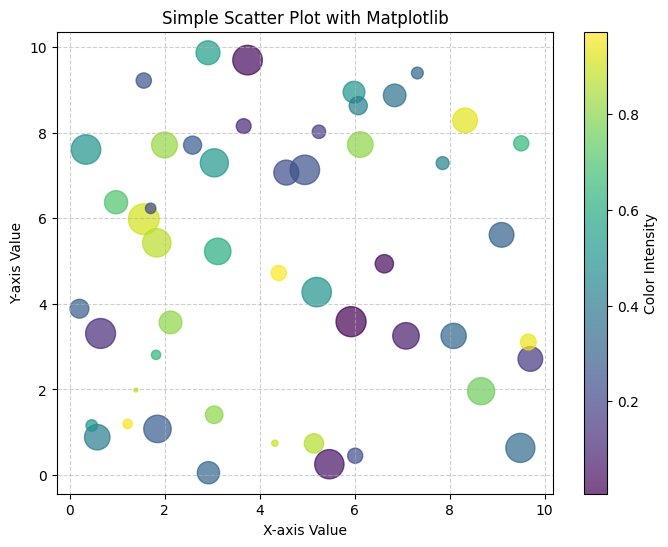

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Generate some sample data
np.random.seed(42)
x = np.random.rand(50) * 10
y = np.random.rand(50) * 10
colors = np.random.rand(50)
sizes = np.random.rand(50) * 500

# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(x, y, c=colors, s=sizes, alpha=0.7, cmap='viridis')

# Add labels and title
plt.xlabel("X-axis Value")
plt.ylabel("Y-axis Value")
plt.title("Simple Scatter Plot with Matplotlib")

# Add a color bar for better understanding of colors
plt.colorbar(label="Color Intensity")

# Add grid for readability
plt.grid(True, linestyle='--', alpha=0.6)

# Show the plot
plt.show()

### 4. How do you calculate the correlation matrix using Seaborn and visualize it with a heatmap?

Original DataFrame (first 5 rows):
   Feature_A  Feature_B   Feature_C  Feature_D
0  64.203165  46.824027  -19.851831  37.735219
1   8.413996  23.461885   54.881536  64.236738
2  16.162871  50.638269   68.605406  49.402022
3  89.855419  60.773810  117.709915  12.220082
4  60.642906  38.796090  140.984142   5.292656

Correlation Matrix:
           Feature_A  Feature_B  Feature_C  Feature_D
Feature_A   1.000000   0.696103  -0.329113   0.099136
Feature_B   0.696103   1.000000  -0.131006   0.001645
Feature_C  -0.329113  -0.131006   1.000000  -0.452678
Feature_D   0.099136   0.001645  -0.452678   1.000000


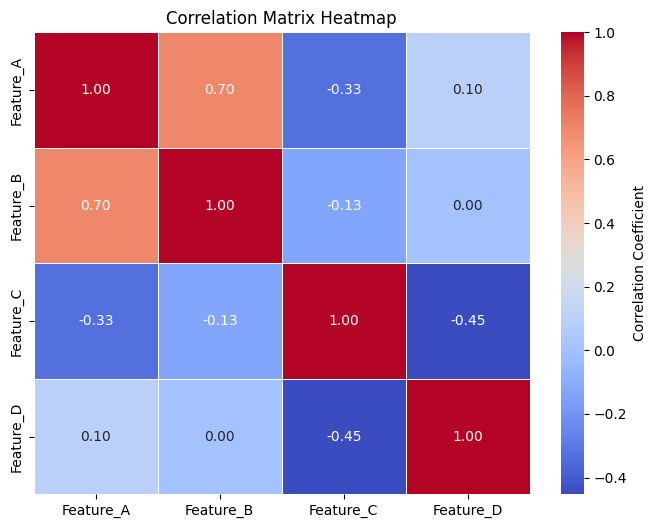

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Create a sample DataFrame with numerical data
data = {
    'Feature_A': np.random.rand(50) * 100,
    'Feature_B': np.random.rand(50) * 50,
    'Feature_C': np.random.rand(50) * 200,
    'Feature_D': np.random.rand(50) * 75
}
df = pd.DataFrame(data)

# Introduce some correlation to make the heatmap interesting
df['Feature_B'] = df['Feature_B'] + df['Feature_A'] * 0.5
df['Feature_C'] = df['Feature_C'] - df['Feature_D'] * 0.8

print("Original DataFrame (first 5 rows):")
print(df.head())

# Calculate the correlation matrix
correlation_matrix = df.corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)

# Visualize the correlation matrix using a Seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    correlation_matrix,          # The correlation matrix to plot
    annot=True,                  # Annotate cells with correlation values
    cmap='coolwarm',             # Color map for positive/negative correlations
    fmt=".2f",                   # Format annotation values to 2 decimal places
    linewidths=.5,               # Add lines between cells
    cbar_kws={'label': 'Correlation Coefficient'} # Color bar label
)
plt.title("Correlation Matrix Heatmap")
plt.show()

### 5. Generate a bar plot using Plotly.


In [1]:
'''import plotly.express as px
import pandas as pd

# Sample data for the bar plot
data = {
    'Category': ['A', 'B', 'C', 'D', 'E'],
    'Values': [23, 45, 56, 12, 39]
}
df = pd.DataFrame(data)

# Create the bar plot using Plotly Express
fig = px.bar(
    df,
    x='Category',
    y='Values',
    title='Sample Bar Plot with Plotly',
    labels={'Category': 'Product Category', 'Values': 'Quantity Sold'},
    color='Values', # Color bars based on their values
    color_continuous_scale=px.colors.sequential.Viridis # Choose a color scale
)

# Update layout for better appearance
fig.update_layout(xaxis_title_font_size=14, yaxis_title_font_size=14)

# Show the plot (this will open in your browser or display in Jupyter)
fig.show()'''

![barplot.png](attachment:barplot.png)

### 6. Create a DataFrame and add a new column based on an existing column.

In [ ]:
import pandas as pd

# Create a sample DataFrame
data = {
    'Product': ['Laptop', 'Mouse', 'Keyboard', 'Monitor'],
    'Price': [1200, 25, 75, 300],
    'Quantity': [2, 10, 5, 1]
}
df = pd.DataFrame(data)

print("Original DataFrame:")
print(df)

# Add a new column 'Total_Sales' by multiplying 'Price' and 'Quantity'
df['Total_Sales'] = df['Price'] * df['Quantity']

# Add another new column 'Discounted_Price' based on a condition
# If price > 100, apply 10% discount, else no discount
df['Discounted_Price'] = df.apply(
    lambda row: row['Price'] * 0.90 if row['Price'] > 100 else row['Price'],
    axis=1
)

print("\nDataFrame with new columns:")
print(df)

Original DataFrame:
    Product  Price  Quantity
0    Laptop   1200         2
1     Mouse     25        10
2  Keyboard     75         5
3   Monitor    300         1

DataFrame with new columns:
    Product  Price  Quantity  Total_Sales  Discounted_Price
0    Laptop   1200         2         2400            1080.0
1     Mouse     25        10          250              25.0
2  Keyboard     75         5          375              75.0
3   Monitor    300         1          300             270.0


### 7. Write a program to perform element-wise multiplication of two NumPy arrays.

In [ ]:
import numpy as np

# Create two NumPy arrays
array1 = np.array([[1, 2, 3], [4, 5, 6]])
array2 = np.array([[7, 8, 9], [10, 11, 12]])

print("Array 1:")
print(array1)

print("\nArray 2:")
print(array2)

# Perform element-wise multiplication
# This uses NumPy's vectorized operations (no explicit loop needed).
elementwise_product = array1 * array2

print("\nElement-wise product of Array 1 and Array 2:")
print(elementwise_product)

# Verify operation with different shapes (broadcasting example)
vector = np.array([10, 20, 30])
print("\nArray 1 again:")
print(array1)
print("\nVector to broadcast:")
print(vector)
broadcasted_product = array1 * vector
print("\nBroadcasted product (Array 1 * Vector):")
print(broadcasted_product)

Array 1:
[[1 2 3]
 [4 5 6]]

Array 2:
[[ 7  8  9]
 [10 11 12]]

Element-wise product of Array 1 and Array 2:
[[ 7 16 27]
 [40 55 72]]

Array 1 again:
[[1 2 3]
 [4 5 6]]

Vector to broadcast:
[10 20 30]

Broadcasted product (Array 1 * Vector):
[[ 10  40  90]
 [ 40 100 180]]


### 8. Create a line plot with multiple lines using Matplotlib.

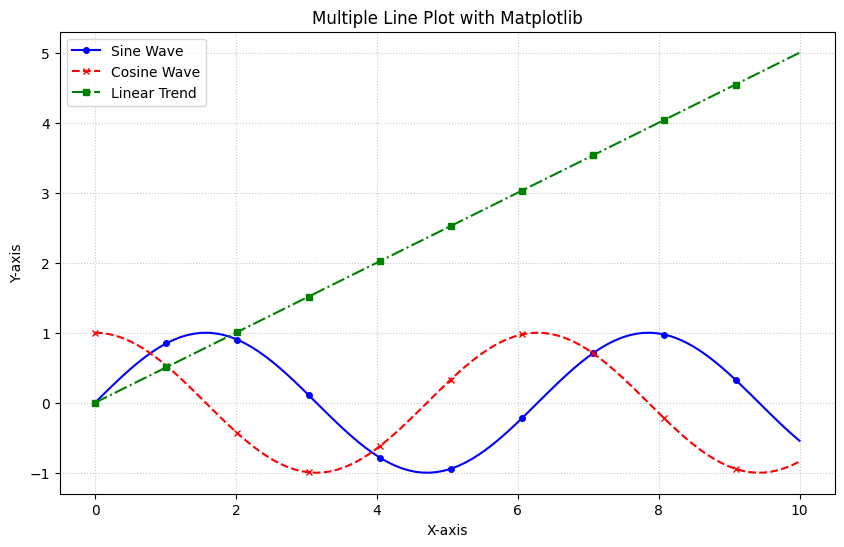

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Generate sample data for multiple lines
x = np.linspace(0, 10, 100) # 100 points between 0 and 10
y1 = np.sin(x)             # First line (sine wave)
y2 = np.cos(x)             # Second line (cosine wave)
y3 = x / 2                 # Third line (linear)

# Create the figure and axes
plt.figure(figsize=(10, 6))

# Plot each line
plt.plot(x, y1, label='Sine Wave', color='blue', linestyle='-', marker='o', markersize=4, markevery=10)
plt.plot(x, y2, label='Cosine Wave', color='red', linestyle='--', marker='x', markersize=4, markevery=10)
plt.plot(x, y3, label='Linear Trend', color='green', linestyle='-.', marker='s', markersize=4, markevery=10)

# Add labels, title, and legend
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Multiple Line Plot with Matplotlib")
plt.legend()

# Add grid
plt.grid(True, linestyle=':', alpha=0.7)

# Show the plot
plt.show()

### 9. Generate a Pandas DataFrame and filter rows where a column value is greater than a threshold.

In [ ]:
import pandas as pd

# Create a sample DataFrame
data = {
    'City': ['New York', 'London', 'Paris', 'Tokyo', 'Berlin', 'Rome'],
    'Population': [8400000, 8900000, 2100000, 13900000, 3700000, 2800000],
    'Area_km2': [789, 1572, 105, 2194, 891, 1285]
}
df = pd.DataFrame(data)

print("Original DataFrame:")
print(df)

# Define a threshold for population
population_threshold = 5000000

# Filter rows where 'Population' is greater than the threshold
filtered_df = df[df['Population'] > population_threshold]

print(f"\nDataFrame with Population > {population_threshold}:")
print(filtered_df)

# Filter using multiple conditions
filtered_and_area = df[(df['Population'] > 3000000) & (df['Area_km2'] < 1000)]
print(f"\nDataFrame with Population > 3M AND Area < 1000 km^2:")
print(filtered_and_area)

Original DataFrame:
       City  Population  Area_km2
0  New York     8400000       789
1    London     8900000      1572
2     Paris     2100000       105
3     Tokyo    13900000      2194
4    Berlin     3700000       891
5      Rome     2800000      1285

DataFrame with Population > 5000000:
       City  Population  Area_km2
0  New York     8400000       789
1    London     8900000      1572
3     Tokyo    13900000      2194

DataFrame with Population > 3M AND Area < 1000 km^2:
       City  Population  Area_km2
0  New York     8400000       789
4    Berlin     3700000       891


### 10. Create a histogram using Seaborn to visualize a distribution.

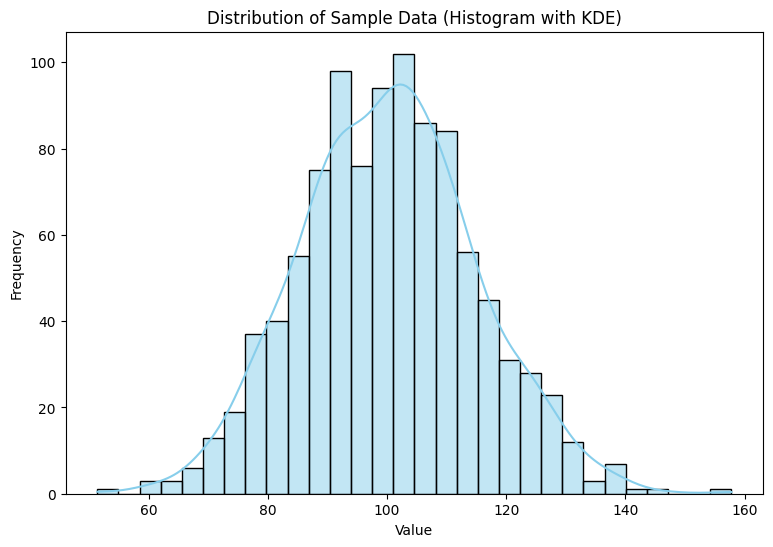

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Generate sample data: a normal distribution
np.random.seed(42)
data = np.random.normal(loc=100, scale=15, size=1000) # Mean=100, StdDev=15, 1000 data points

# Create the histogram using Seaborn's histplot
plt.figure(figsize=(9, 6))
sns.histplot(
    data,                 # The data to plot
    bins=30,              # Number of bins
    kde=True,             # Overlay a Kernel Density Estimate (KDE) plot
    color='skyblue',      # Color of the bars
    edgecolor='black',    # Color of the bar borders
    stat='count'          # Y-axis shows count of observations in each bin. Can also be 'density', 'frequency', 'probability'
)

# Add labels and title
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Distribution of Sample Data (Histogram with KDE)")

# Show the plot
plt.show()

### 11. Perform matrix multiplication using NumPy.

In [ ]:
import numpy as np

# Define two matrices (2x3 and 3x2)
matrix_a = np.array([
    [1, 2, 3],
    [4, 5, 6]
])

matrix_b = np.array([
    [7, 8],
    [9, 10],
    [11, 12]
])

print("Matrix A:")
print(matrix_a)
print(f"Shape of Matrix A: {matrix_a.shape}")

print("\nMatrix B:")
print(matrix_b)
print(f"Shape of Matrix B: {matrix_b.shape}")

# Perform matrix multiplication using the @ operator (Python 3.5+) or np.dot()
# For matrix multiplication, the number of columns in the first matrix must equal
# the number of rows in the second matrix.
# (2x3) @ (3x2) -> (2x2)
matrix_product = matrix_a @ matrix_b

print("\nMatrix Product (A @ B):")
print(matrix_product)
print(f"Shape of Product Matrix: {matrix_product.shape}")

# Alternative using np.dot()
# matrix_product_dot = np.dot(matrix_a, matrix_b)
# print("\nMatrix Product (np.dot(A, B)):")
# print(matrix_product_dot)

Matrix A:
[[1 2 3]
 [4 5 6]]
Shape of Matrix A: (2, 3)

Matrix B:
[[ 7  8]
 [ 9 10]
 [11 12]]
Shape of Matrix B: (3, 2)

Matrix Product (A @ B):
[[ 58  64]
 [139 154]]
Shape of Product Matrix: (2, 2)


### 12. Use Pandas to load a CSV file and display its first 5 rows.

In [ ]:
import pandas as pd
import os

# First, create a dummy CSV file for demonstration
csv_content = """
Name,Age,City,Occupation
Alice,30,New York,Engineer
Bob,24,London,Artist
Charlie,35,Paris,Doctor
David,29,Tokyo,Teacher
Eve,42,Berlin,Manager
Frank,22,Rome,Student
Grace,38,Sydney,Scientist
"""
file_name = "sample_data.csv"
with open(file_name, "w") as f:
    f.write(csv_content.strip())
print(f"Created dummy CSV file: {file_name}")

# Load the CSV file into a Pandas DataFrame
try:
    df = pd.read_csv(file_name)

    print(f"\nSuccessfully loaded '{file_name}'.")
    print("\nFirst 5 rows of the DataFrame:")
    # Display the first 5 rows using .head()
    print(df.head())

except FileNotFoundError:
    print(f"Error: The file '{file_name}' was not found.")
except pd.errors.EmptyDataError:
    print(f"Error: The file '{file_name}' is empty.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

# Clean up the dummy file
# if os.path.exists(file_name):
#     os.remove(file_name)
#     print(f"\nRemoved dummy CSV file: {file_name}")

Created dummy CSV file: sample_data.csv

Successfully loaded 'sample_data.csv'.

First 5 rows of the DataFrame:
      Name  Age      City Occupation
0    Alice   30  New York   Engineer
1      Bob   24    London     Artist
2  Charlie   35     Paris     Doctor
3    David   29     Tokyo    Teacher
4      Eve   42    Berlin    Manager


### 13. Create a 3D scatter plot using Plotly.

In [2]:
'''import plotly.express as px
import pandas as pd
import numpy as np

# Generate sample 3D data
np.random.seed(42)
num_points = 100
x_data = np.random.rand(num_points) * 10
y_data = np.random.rand(num_points) * 10
z_data = np.random.rand(num_points) * 10
# Add a categorical variable for color mapping
category = np.random.choice(['Group A', 'Group B', 'Group C'], size=num_points)

# Create a DataFrame for Plotly
df_3d = pd.DataFrame({
    'X': x_data,
    'Y': y_data,
    'Z': z_data,
    'Category': category
})

# Create the 3D scatter plot using Plotly Express
fig = px.scatter_3d(
    df_3d,
    x='X',
    y='Y',
    z='Z',
    color='Category', # Color points by category
    symbol='Category', # Use different symbols by category
    title='3D Scatter Plot with Plotly',
    labels={'X': 'Dimension X', 'Y': 'Dimension Y', 'Z': 'Dimension Z'},
    hover_data=['X', 'Y', 'Z', 'Category'] # Show data on hover
)

# Update layout for better appearance and camera angle
fig.update_layout(
    scene=dict(
        xaxis_title='X Dimension',
        yaxis_title='Y Dimension',
        zaxis_title='Z Dimension',
        bgcolor="white" # Set background color of the 3D scene
    ),
    margin=dict(l=0, r=0, b=0, t=40) # Adjust margins
)

# Show the plot (this will open in your browser or display in Jupyter)
fig.show()'''

![image.png](attachment:image.png)